In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
# Step 2: Load Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print("First five rows of Iris dataset:\n", df.head())

First five rows of Iris dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# Optional: View dataset info
print("\nDataset info:\n", df.describe())


Dataset info:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
# Step 3: Use only two features for easy 2D visualization
X = df[["sepal length (cm)", "petal length (cm)"]]

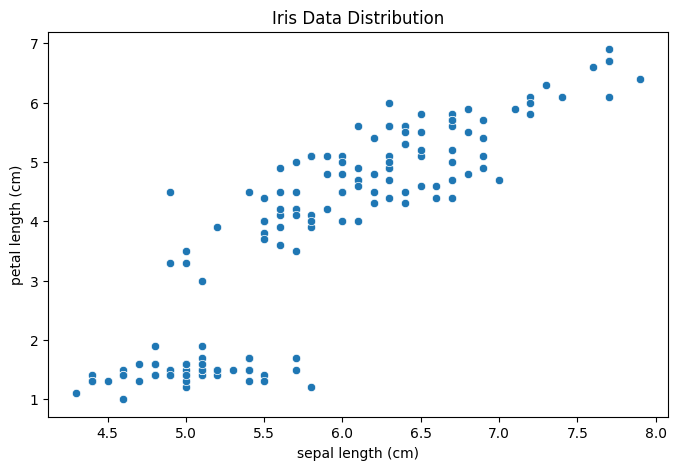

In [ ]:
# Step 4: Visualize Raw Data
plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df)
plt.title("Iris Data Distribution")
plt.show()

In [ ]:
# Step 5: Calculate WSS for k = 1 to 10
wss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

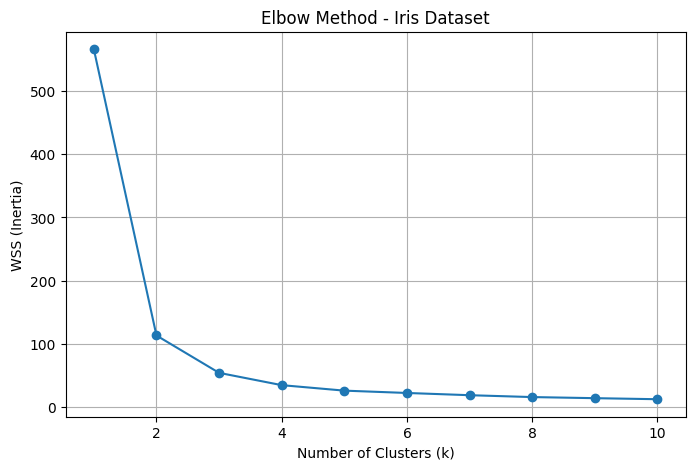

In [ ]:
# Step 6: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WSS (Inertia)")
plt.title("Elbow Method - Iris Dataset")
plt.grid(True)
plt.show()

In [ ]:
# Step 7: Use Optimal K (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

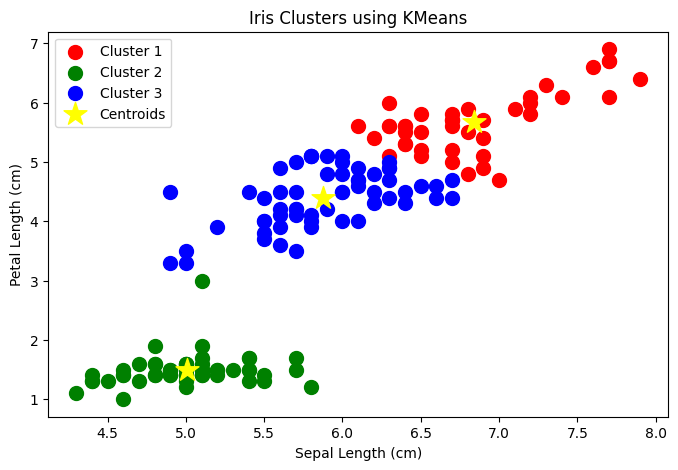

In [ ]:
# Step 8: Visualize Clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='*')
plt.title("Iris Clusters using KMeans")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()